In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.  Preprocessing phase :

## let's start by displaying the header of the dataset 

In [546]:
data = pd.read_csv('titanic-passengers.csv', sep=';')
df = data.copy()
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


## some general information about data columns and values. 

In [547]:
#Some information about data columns and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [548]:
#descriptive statistics of numerical feature.
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [549]:
#Descriptive statistics of categorical feature.
df.describe(include=['O'])

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Collander, Mr. Erik Gustaf",male,CA. 2343,G6,S
freq,549,1,577,7,4,644


# Data cleaning

In [550]:
#Let's display the number of missing values in the data set
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [551]:
#There are not many missing values for age, so we can replace them with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [552]:
#We can remove the cabin number because there are a lot of missing values. 
df = df.drop(['Cabin'], axis=1)

In [555]:
#We can replace the missing values of the "Embarked" feature by the mode
df['Embarked'].fillna('S', inplace=True)

In [556]:
#Let's check that there are no more missing values in the data set.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Transformation

In [557]:
#Display of all categorical feature.
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['Survived', 'Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [558]:
df['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [559]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [560]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [561]:
#Categorical feature encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Survived'] = encoder.fit_transform(df['Survived'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,3101276,7.9250,2
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,358585,14.5000,2
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15.7417,0
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,A/5 21173,7.2500,2
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,SC/AH 3085,26.0000,2


In [562]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [563]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [564]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

## Features selection

In [565]:
#We assume that we can remove the ticket number from our sample, 
#beacause we can reasonably think that there is no correlation with passenger survival.
#The PassengerId value can also be deleted because it does not provide any information.
df = df.drop(['PassengerId','Ticket'], axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,0
887,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,7.2292,0
888,0,3,"Cacic, Miss. Marija",0,30.0,0,0,8.6625,2
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28.0,0,0,7.8958,2


# 2. Visualization phase :

### Let's start by looking at the distribution of the most important features based on our understanding of the dataset and the problem.

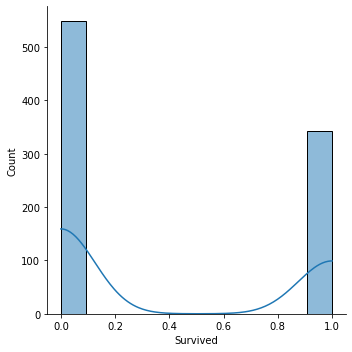

In [566]:
#The distribution of the feature "Survived"
sns.displot(df, x="Survived",kde = True)

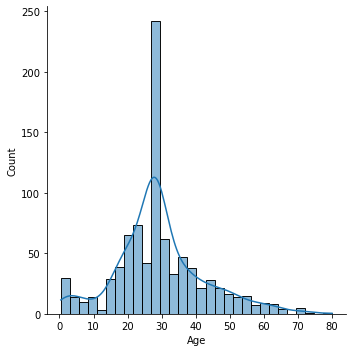

In [567]:
#The distribution of the feature "Age"
sns.displot(df, x="Age",kde = True)

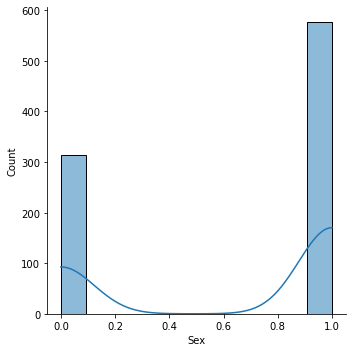

In [568]:
#The distribution of the feature "Sex"
sns.displot(df, x="Sex",kde = True)

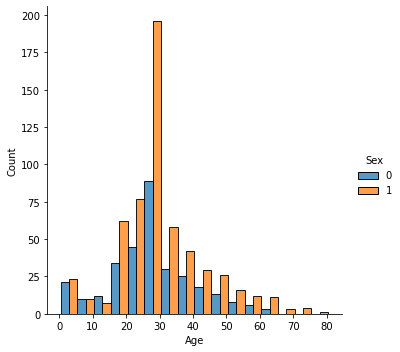

In [569]:
#the correlation between Sex and Age
sns.displot(df, x="Age", hue="Sex", multiple="dodge", binwidth=5)

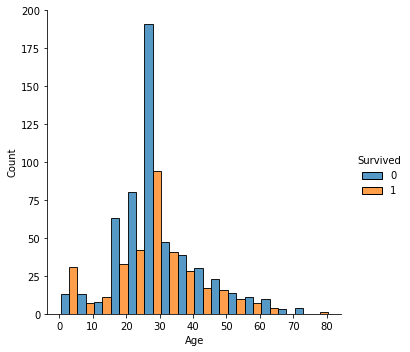

In [571]:
#the correlation between Age and Survived
sns.displot(df, x="Age", hue="Survived", multiple="dodge", binwidth=5)

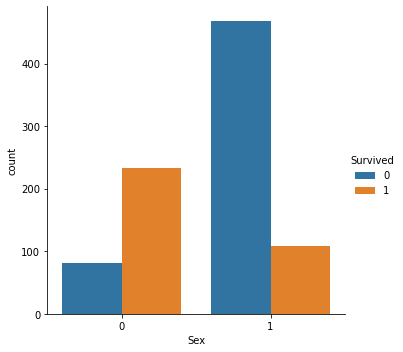

In [572]:
#the correlation between Sex and Survived
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = df)

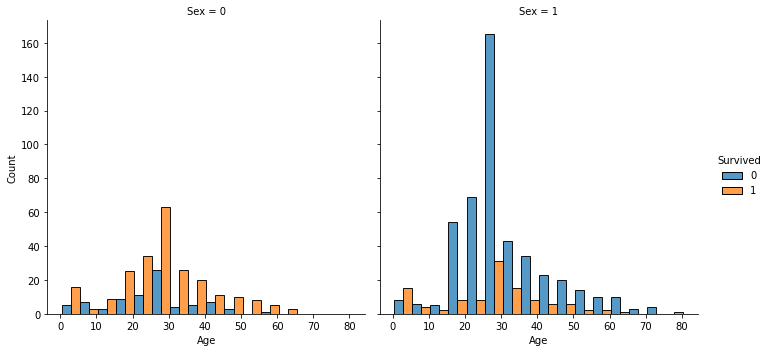

In [573]:
#the correlation between Age, Sex and Survived
sns.displot(df,x ='Age', hue ='Survived', col ='Sex',multiple="dodge", binwidth=5)

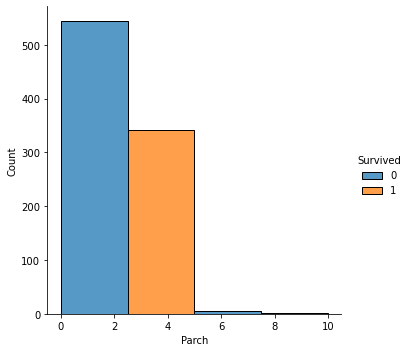

In [574]:
#the correlation between Parch and Survived
sns.displot(df, x="Parch", hue="Survived", multiple="dodge", binwidth=5)

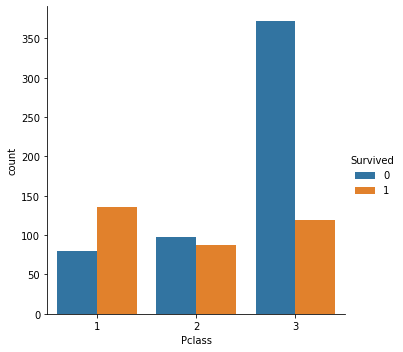

In [575]:
#the correlation between Pclass and Survived
sns.catplot(x ="Pclass", hue ="Survived",kind ="count", data = df)

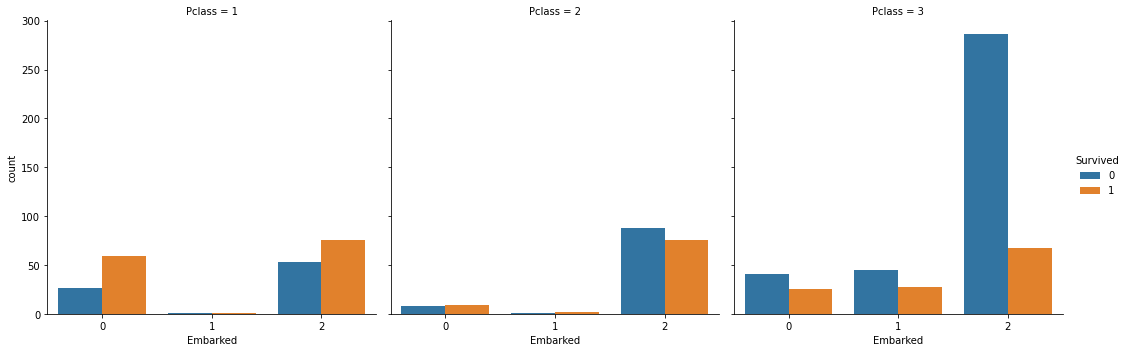

In [576]:
#the correlation between Pclass, Embarked and Survived
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)

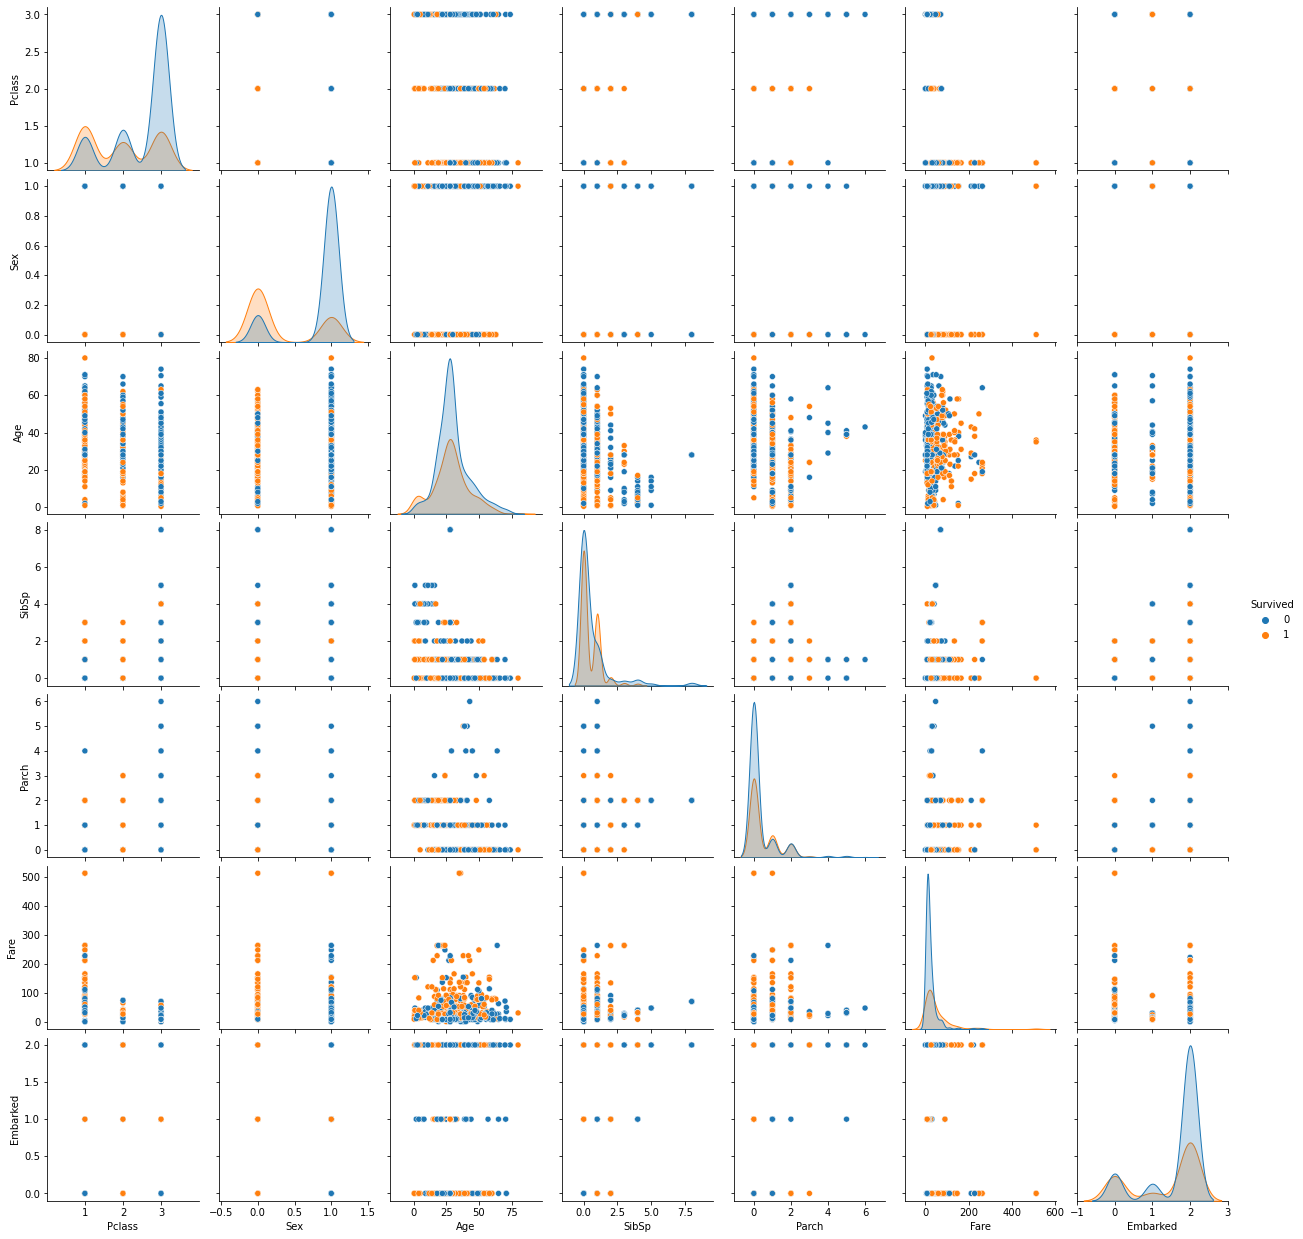

In [577]:
#Paired bivariate distributions of the data set according to the "Survived" feature
sns.pairplot(df, hue='Survived')

### correlation matrix

In [578]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

The "plot_correlation_map" function allows us to plot the correlation matrix using the corr() function and seaborn.heatmap().

The corr() function returns the correlation matrix of the DataFrame.
Correlation indicates how variables in a data set relate to each other and how they move relative to each other. The correlation value ranges from -1 to +1.
0 Correlation indicates that two variables are independent of each other. A positive correlation indicates that the variables are moving in the same direction, and a negative correlation indicates the opposite.

The seaborn.heatmap() method plots rectangular data as a color-coded matrix.

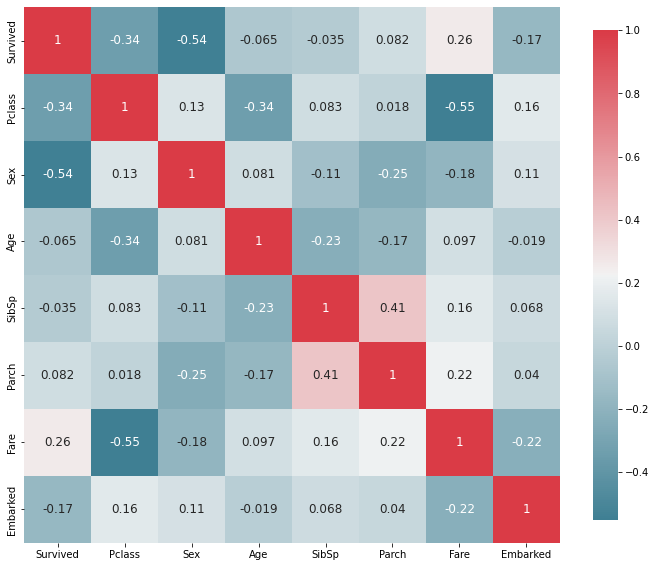

In [579]:
#execution of the function
plot_correlation_map(df)

We can conclude that there are strong positive correlations between SibSp and Parch and that makes sense because children often have siblings, and parents and children often travel together.  

We can see that Pclass and Fare are strongly negatively correlated that makes sense because 1st class tickets are more expensive than lower class tickets, meaning as class goes down (closer to 1) the fare goes up.

We can also see that Age and Pclass are moderately negatively correlated since richer people are generally older.

Finally we also note a weakly positive linear relationship between fare and survival, explained by the fact that those who paid a higher fare which (equals a higher class) have a higher chance of surviving

### Using the groupby function combined with the mean () to display the relationship between Pclass and survived 

In [580]:
relation_Pclass_Survived=df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()
relation_Pclass_Survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### removal and restoration of the "name" feature 

In [581]:
#remove name column
df = df.drop(['Name'], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28.0,0,0,13.0000,2
1,0,3,1,25.0,0,0,7.6500,2
2,0,3,1,20.0,0,0,7.8542,2
3,0,3,0,29.0,0,4,21.0750,2
4,0,1,1,31.0,1,0,52.0000,2


In [582]:
#restoring the name column
df["Name"]=data["Name"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,0,2,1,28.0,0,0,13.0000,2,"Collander, Mr. Erik Gustaf"
1,0,3,1,25.0,0,0,7.6500,2,"Moen, Mr. Sigurd Hansen"
2,0,3,1,20.0,0,0,7.8542,2,"Jensen, Mr. Hans Peder"
3,0,3,0,29.0,0,4,21.0750,2,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,0,1,1,31.0,1,0,52.0000,2,"Davidson, Mr. Thornton"
...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,30.0708,0,"Nasser, Mrs. Nicholas (Adele Achem)"
887,0,3,1,22.0,0,0,7.2292,0,"Sirayanian, Mr. Orsen"
888,0,3,0,30.0,0,0,8.6625,2,"Cacic, Miss. Marija"
889,0,3,1,28.0,0,0,7.8958,2,"Petroff, Mr. Pastcho (""Pentcho"")"


### creation of a new feature "Title"

In [583]:
#creation of a new feature "Title"
combine = [df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#removal of the "name" feature
df = df.drop(['Name'], axis=1)
df.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
881,0,1,1,49.0,1,1,110.8833,0,Mr
882,1,2,0,54.0,1,3,23.0000,2,Mrs
883,0,2,1,39.0,0,0,13.0000,2,Mr
884,0,2,1,28.0,0,0,0.0000,2,Mr
885,0,2,1,42.0,0,0,13.0000,2,Rev
886,1,2,0,14.0,1,0,30.0708,0,Mrs
887,0,3,1,22.0,0,0,7.2292,0,Mr
888,0,3,0,30.0,0,0,8.6625,2,Miss
889,0,3,1,28.0,0,0,7.8958,2,Mr
890,1,2,0,19.0,0,0,26.0000,2,Miss


### Visualization of the correlation between title and other characteristics (e.g. gender, price, age...) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Dr'),
  Text(4, 0, 'Major'),
  Text(5, 0, 'Don'),
  Text(6, 0, 'Master'),
  Text(7, 0, 'Rev'),
  Text(8, 0, 'Col'),
  Text(9, 0, 'Mlle'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Jonkheer'),
  Text(12, 0, 'Mme'),
  Text(13, 0, 'Sir'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Ms')])

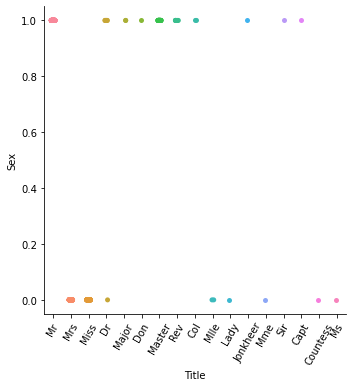

In [584]:
#the correlation between Title and Sex
sns.catplot(x="Title", y="Sex", data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Dr'),
  Text(4, 0, 'Major'),
  Text(5, 0, 'Don'),
  Text(6, 0, 'Master'),
  Text(7, 0, 'Rev'),
  Text(8, 0, 'Col'),
  Text(9, 0, 'Mlle'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Jonkheer'),
  Text(12, 0, 'Mme'),
  Text(13, 0, 'Sir'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Ms')])

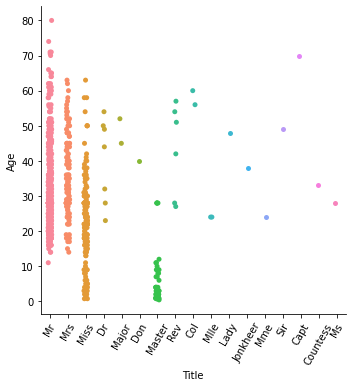

In [585]:
#the correlation between Title and Age
sns.catplot(x="Title", y="Age", data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Dr'),
  Text(4, 0, 'Major'),
  Text(5, 0, 'Don'),
  Text(6, 0, 'Master'),
  Text(7, 0, 'Rev'),
  Text(8, 0, 'Col'),
  Text(9, 0, 'Mlle'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Jonkheer'),
  Text(12, 0, 'Mme'),
  Text(13, 0, 'Sir'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Ms')])

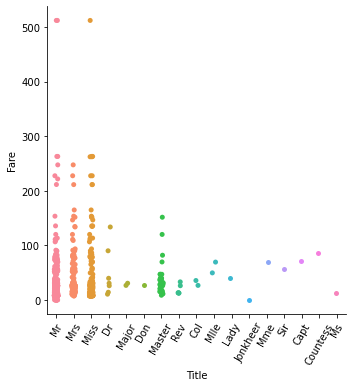

In [586]:
#the correlation between Title and Fare
sns.catplot(x="Title", y="Fare", data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Dr'),
  Text(4, 0, 'Major'),
  Text(5, 0, 'Don'),
  Text(6, 0, 'Master'),
  Text(7, 0, 'Rev'),
  Text(8, 0, 'Col'),
  Text(9, 0, 'Mlle'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Jonkheer'),
  Text(12, 0, 'Mme'),
  Text(13, 0, 'Sir'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Ms')])

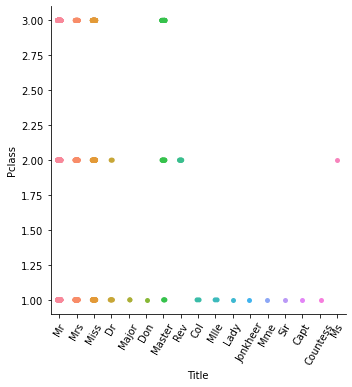

In [587]:
#the correlation between Title and Pclass
sns.catplot(x="Title", y="Pclass", data=df)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Dr'),
  Text(4, 0, 'Major'),
  Text(5, 0, 'Don'),
  Text(6, 0, 'Master'),
  Text(7, 0, 'Rev'),
  Text(8, 0, 'Col'),
  Text(9, 0, 'Mlle'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Jonkheer'),
  Text(12, 0, 'Mme'),
  Text(13, 0, 'Sir'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Ms')])

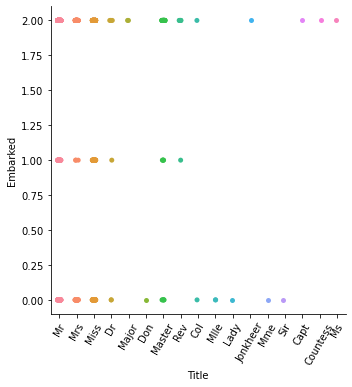

In [588]:
#the correlation between Title and Embarked
sns.catplot(x="Title", y="Embarked", data=df)
plt.xticks(rotation=60)

In [589]:
Title_Dictionary = {

    "Capt":"Officer",

    "Col":"Officer",

    "Major":"Officer",

    "Dr":"Officer",

    "Rev":"Officer",

    "Jonkheer":"Royalty",

    "Dona":"Royalty",

    "Sir":"Royalty",

    "Lady":"Royalty",

    "Countess":"Royalty",

    "Don":"Royalty",

    "Mme":"Miss",

    "Mlle":"Miss",

    "Miss":"Miss",

    "Ms":"Mrs",

    "Mr" :"Mrs",

    "Mrs":"Mrs",

    "Master":"Master"

                    }
df.replace(Title_Dictionary, inplace=True)

### Let's now visualize the same correlations using these new titles.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mrs'),
  Text(1, 0, 'Miss'),
  Text(2, 0, 'Officer'),
  Text(3, 0, 'Royalty'),
  Text(4, 0, 'Master')])

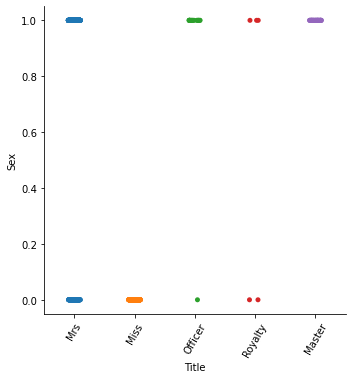

In [590]:
#the correlation between Title and Sex
sns.catplot(x="Title", y="Sex", data=df)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mrs'),
  Text(1, 0, 'Miss'),
  Text(2, 0, 'Officer'),
  Text(3, 0, 'Royalty'),
  Text(4, 0, 'Master')])

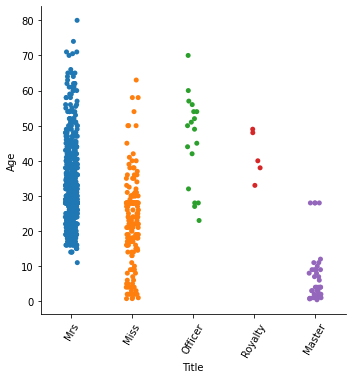

In [591]:
#the correlation between Title and Age
sns.catplot(x="Title", y="Age", data=df)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mrs'),
  Text(1, 0, 'Miss'),
  Text(2, 0, 'Officer'),
  Text(3, 0, 'Royalty'),
  Text(4, 0, 'Master')])

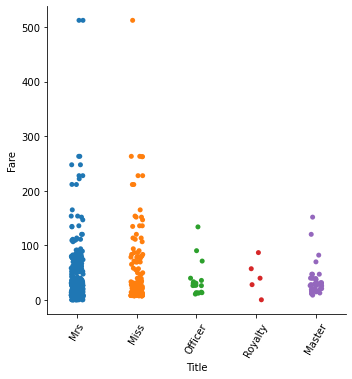

In [592]:
#the correlation between Title and Fare
sns.catplot(x="Title", y="Fare", data=df)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mrs'),
  Text(1, 0, 'Miss'),
  Text(2, 0, 'Officer'),
  Text(3, 0, 'Royalty'),
  Text(4, 0, 'Master')])

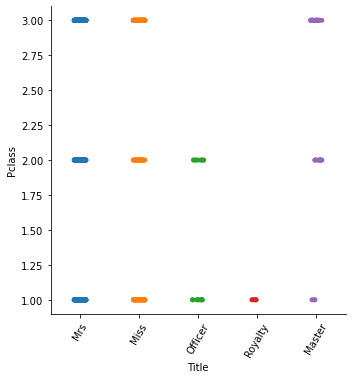

In [593]:
#the correlation between Title and Pclass
sns.catplot(x="Title", y="Pclass", data=df)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mrs'),
  Text(1, 0, 'Miss'),
  Text(2, 0, 'Officer'),
  Text(3, 0, 'Royalty'),
  Text(4, 0, 'Master')])

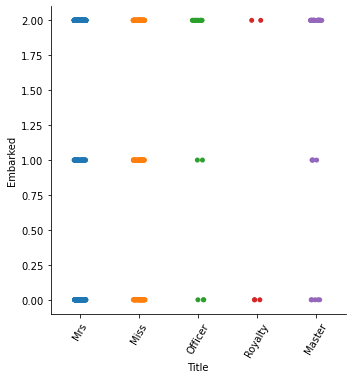

In [594]:
#the correlation between Title and Embarked
sns.catplot(x="Title", y="Embarked", data=df)
plt.xticks(rotation=60)

### correlation matrix with the added title feature

In [595]:
#encoding of the feature "title"
df['Title'] = encoder.fit_transform(df['Title'])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,1,28.0,0,0,13.0000,2,2
1,0,3,1,25.0,0,0,7.6500,2,2
2,0,3,1,20.0,0,0,7.8542,2,2
3,0,3,0,29.0,0,4,21.0750,2,2
4,0,1,1,31.0,1,0,52.0000,2,2
5,0,3,1,37.0,2,0,7.9250,2,2
6,0,3,1,19.0,0,0,14.5000,2,2
7,1,3,0,1.0,0,2,15.7417,0,1
8,0,3,1,20.5,0,0,7.2500,2,2
9,1,2,0,42.0,1,0,26.0000,2,2


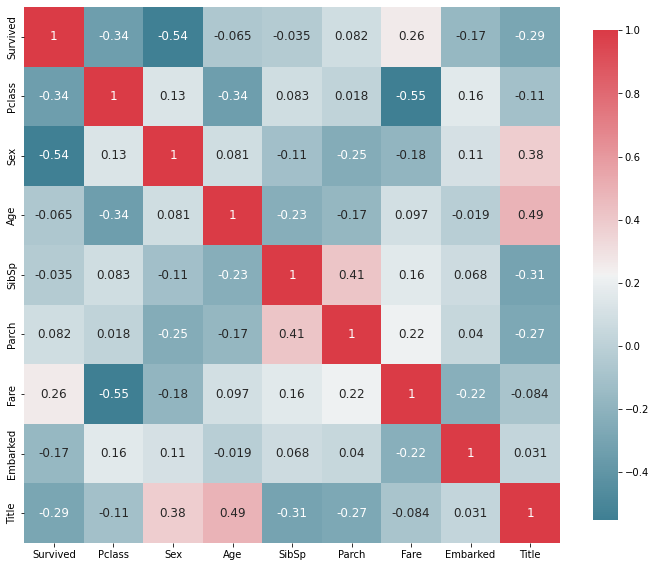

In [596]:
plot_correlation_map(df)

### creation of the FamilySize feature

In [597]:
for dataset in df:
    df['FamilySize'] = df['SibSp'] + df['Parch']+1

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,0,0,13.0000,2,2,1
1,0,3,1,25.0,0,0,7.6500,2,2,1
2,0,3,1,20.0,0,0,7.8542,2,2,1
3,0,3,0,29.0,0,4,21.0750,2,2,5
4,0,1,1,31.0,1,0,52.0000,2,2,2
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,30.0708,0,2,2
887,0,3,1,22.0,0,0,7.2292,0,2,1
888,0,3,0,30.0,0,0,8.6625,2,1,1
889,0,3,1,28.0,0,0,7.8958,2,2,1


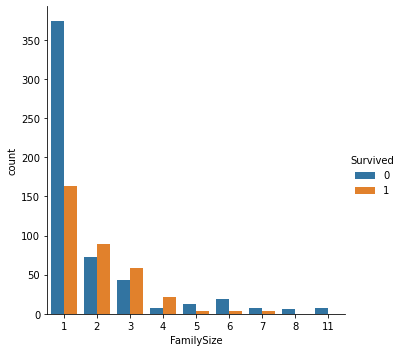

In [599]:
#the correlation between FamilySize and Survived
sns.catplot(x ="FamilySize", hue ="Survived",kind ="count", data = df)

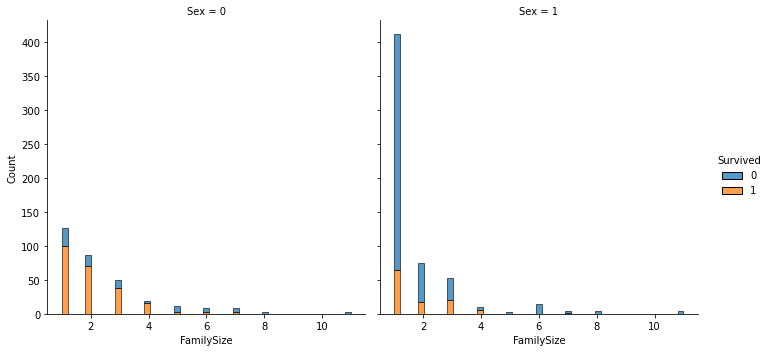

In [600]:
sns.displot(df, x="FamilySize", hue="Survived", multiple="stack", col="Sex")

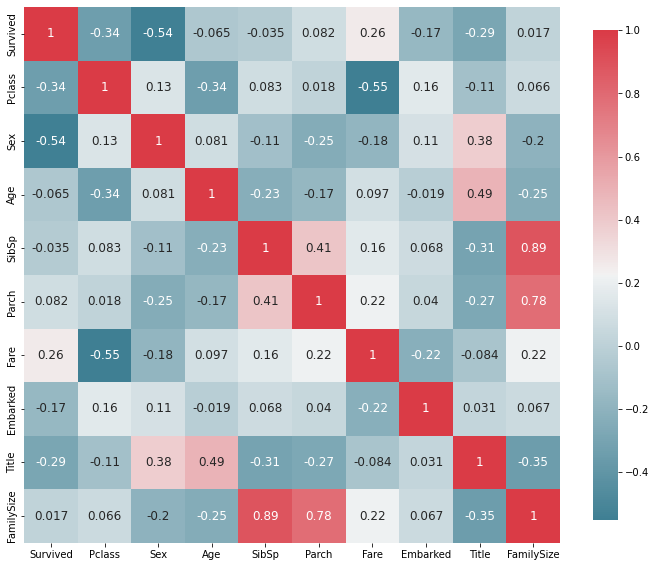

In [601]:
plot_correlation_map(df)

The family size feature is a useful feature because it impacts survival. We can see that the higher 
family size is, the less survival there is.